In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

import re
%matplotlib inline

In [3]:
train= pd.read_csv('C://Users//amyhu//Google Drive//686//train_1.csv//train_1.csv')
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [66]:
test = pd.read_csv('C://Users//amyhu//Google Drive//686//train_2.csv//train_2.csv')
test = test.set_index('Page')
test = test.loc[:,'2017-01-01':'2017-03-31']
test.head()

,2017-01-01,2017-01-02,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-07,2017-01-08,2017-01-09,2017-01-10,...,2017-03-22,2017-03-23,2017-03-24,2017-03-25,2017-03-26,2017-03-27,2017-03-28,2017-03-29,2017-03-30,2017-03-31
Page,,,,,,,,,,,,,,,,,,,,,
2NE1_zh.wikipedia.org_all-access_spider,26.0,42.0,35.0,13.0,51.0,11.0,12.0,31.0,15.0,4.0,...,23.0,44.0,11.0,22.0,33.0,66.0,19.0,73.0,17.0,17.0
2PM_zh.wikipedia.org_all-access_spider,27.0,58.0,47.0,10.0,29.0,79.0,21.0,39.0,16.0,37.0,...,54.0,31.0,48.0,15.0,21.0,14.0,7.0,14.0,24.0,28.0
3C_zh.wikipedia.org_all-access_spider,13.0,8.0,12.0,3.0,5.0,10.0,4.0,1.0,17.0,3.0,...,1.0,3.0,1.0,4.0,6.0,8.0,3.0,3.0,2.0,1.0
4minute_zh.wikipedia.org_all-access_spider,12.0,16.0,9.0,9.0,16.0,18.0,15.0,5.0,16.0,14.0,...,24.0,15.0,17.0,36.0,20.0,11.0,11.0,29.0,32.0,19.0
52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,8.0,22.0,12.0,17.0,61.0,36.0,21.0,14.0,13.0,10.0,...,14.0,14.0,25.0,20.0,17.0,13.0,15.0,27.0,20.0,21.0


In [7]:
webpage = set(train.Page)
webpage = list(webpage)[0:10]

In [9]:
webpage

['Quest_Pistols_Show_ru.wikipedia.org_mobile-web_all-agents',
 'Arthur_Rimbaud_fr.wikipedia.org_all-access_spider',
 'Изнасилование_Дианы_Шурыгиной_ru.wikipedia.org_all-access_spider',
 'Ghent_City_Museum_en.wikipedia.org_all-access_all-agents',
 'Amir_Khan_(boxer)_en.wikipedia.org_mobile-web_all-agents',
 '石坂浩二_ja.wikipedia.org_all-access_spider',
 '511地震預言_zh.wikipedia.org_mobile-web_all-agents',
 'File:Fra_Københavns_Børs.jpg_commons.wikimedia.org_all-access_spider',
 '被告人_(韓國電視劇)_zh.wikipedia.org_all-access_all-agents',
 'Niko_Kovač_de.wikipedia.org_desktop_all-agents',
 '市井昌秀_ja.wikipedia.org_desktop_all-agents',
 'Durian_de.wikipedia.org_mobile-web_all-agents',
 'Jean_Valjean_fr.wikipedia.org_all-access_spider',
 'Bundy_standoff_en.wikipedia.org_desktop_all-agents',
 'Jason_Bourne_en.wikipedia.org_all-access_all-agents',
 'Mareva_Galanter_fr.wikipedia.org_all-access_spider',
 'Annette_Frier_de.wikipedia.org_mobile-web_all-agents',
 '2016_MTV_Video_Music_Awards_en.wikipedia.org_mo

In [12]:
train = train[train.Page.isin(webpage)]

In [13]:
test = test[test.Page.isin(webpage)]

In [14]:
train_flattened = pd.melt(train[list(train.columns[-550:])+['Page']], id_vars='Page', var_name='date', value_name='Visits')

In [15]:
train_flattened

,Page,date,Visits
0,槍彈辯駁_希望學園與絕望高中生_zh.wikipedia.org_all-access_sp...,2015-07-01,5.0
1,梁靜茹_zh.wikipedia.org_all-access_spider,2015-07-01,58.0
2,愛你的時間_zh.wikipedia.org_all-access_spider,2015-07-01,93.0
3,金材昱_zh.wikipedia.org_all-access_spider,2015-07-01,2.0
4,唐紫睿_zh.wikipedia.org_all-access_spider,2015-07-01,16.0
5,半妖倾城_zh.wikipedia.org_all-access_spider,2015-07-01,NaN
6,Bundy_standoff_en.wikipedia.org_desktop_all-ag...,2015-07-01,726.0
7,Yayoi_Kusama_en.wikipedia.org_desktop_all-agents,2015-07-01,225.0
8,Elvis_Presley_en.wikipedia.org_desktop_all-agents,2015-07-01,5679.0
9,File:H96566k.jpg_commons.wikimedia.org_all-acc...,2015-07-01,1.0


In [16]:
train_flattened = train_flattened.fillna(0)

In [17]:
train_flattened['date'] = train_flattened['date'].astype('datetime64[ns]')
train_flattened['weekend'] = ((train_flattened.date.dt.dayofweek) // 5 == 1).astype(float)

In [18]:
train_flattened.head()

,Page,date,Visits,weekend
0,槍彈辯駁_希望學園與絕望高中生_zh.wikipedia.org_all-access_sp...,2015-07-01,5.0,0.0
1,梁靜茹_zh.wikipedia.org_all-access_spider,2015-07-01,58.0,0.0
2,愛你的時間_zh.wikipedia.org_all-access_spider,2015-07-01,93.0,0.0
3,金材昱_zh.wikipedia.org_all-access_spider,2015-07-01,2.0,0.0
4,唐紫睿_zh.wikipedia.org_all-access_spider,2015-07-01,16.0,0.0


In [19]:
train_flattened.reset_index(drop=False,inplace=True)
train_flattened['weekday'] = train_flattened['date'].apply(lambda x: x.weekday())
train_flattened['year']=train_flattened.date.dt.year 
train_flattened['month']=train_flattened.date.dt.month 
train_flattened['day']=train_flattened.date.dt.day

In [20]:
train_flattened.head()

,index,Page,date,Visits,weekend,weekday,year,month,day
0,0,槍彈辯駁_希望學園與絕望高中生_zh.wikipedia.org_all-access_sp...,2015-07-01,5.0,0.0,2,2015,7,1
1,1,梁靜茹_zh.wikipedia.org_all-access_spider,2015-07-01,58.0,0.0,2,2015,7,1
2,2,愛你的時間_zh.wikipedia.org_all-access_spider,2015-07-01,93.0,0.0,2,2015,7,1
3,3,金材昱_zh.wikipedia.org_all-access_spider,2015-07-01,2.0,0.0,2,2015,7,1
4,4,唐紫睿_zh.wikipedia.org_all-access_spider,2015-07-01,16.0,0.0,2,2015,7,1


In [204]:
# times_series =  pd.DataFrame(train_flattened).reset_index(drop=False)
# times_series['weekday'] = times_series['date'].apply(lambda x: x.weekday())
# times_series['Date_str'] = times_series['date'].apply(lambda x: str(x))
# times_series[['year','month','day']] = pd.DataFrame(times_series['Date_str'].str.split('-',2).tolist(), columns = ['year','month','day'])
# date_staging = pd.DataFrame(times_series['day'].str.split(' ',2).tolist(), columns = ['day','other'])
# times_series['day'] = date_staging['day']*1
# times_series.drop('Date_str',axis = 1, inplace =True)
# times_series.head()

In [21]:
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA

In [22]:
last_date = train_flattened['date'].max()
last_date

Timestamp('2016-12-31 00:00:00')

In [24]:
list_date = []
for i in range(91):
    if i >0:
        list_date.append(last_date  + pd.to_timedelta(i, unit='D'))
        

In [25]:
columnsname = []
for d in list_date:
    columnsname += [str(d)]

In [26]:
df = pd.DataFrame(columns=(columnsname))

In [27]:
error = []

In [28]:
from numpy.linalg import LinAlgError

In [32]:

for i in webpage:
    subtrain = train_flattened[train_flattened.Page == i]
    subtrain = subtrain[['date','Visits']].set_index('date')
    
    #decomposition = 0
    try:
#         decomposition = sm.tsa.seasonal_decompose(subtrain, model='multiplicative',freq = 7)
#         trend = decomposition.trend
#         seasonal = decomposition.seasonal
#         residual = decomposition.resid
    
#         rcParams['figure.figsize'] = 30, 20
    

    
#         trend_1 = trend.dropna(0)
#         mode_t = ARIMA(trend_1, order=(20, 1, 0))  
#         results_AR_t = mode_t.fit(disp=-1)  
#         forecast_t = results_AR_t.forecast(steps = 90)[0]
#         forecast_t = forecast_t.flatten()
    
#         forecast_s = np.array(seasonal.iloc[4:94])
#         forecast_s = forecast_s.flatten()
    
#         residual_1 = residual.dropna(0)
#         mode_r = ARIMA(residual_1, order=(11, 1, 0))  
#         results_AR_r = mode_r.fit(disp=-1)  
#         forecast_r = results_AR_r.forecast(steps = 90)[0]
#         forecast_r = forecast_r.flatten()
    
#         forecast = np.add(forecast_t , forecast_s , forecast_r)
        
        mode = ARIMA(subtrain, order=(20, 1, 0))
        results_AR = mode.fit(disp=-1)
        forecast = results_AR.forecast(steps = 90)[0]
        forecast = forecast.flatten()
        df.loc[i]= forecast 
        
    except(ValueError,LinAlgError,NameError):
        error += [i]
        continue

        
#     except(LinAlgError):
#         error_l += [i]
#         continue    

    

C:\Users\amyhu\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:584: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/
C:\Users\amyhu\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:585: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
C:\Users\amyhu\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:585: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Users\amyhu\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:586: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/
C:\Users\amyhu\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:587: RuntimeWarning: overflow encountered in exp
  (1+np.exp(-params))).copy()
C:\Users\amyhu\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:587: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\Users\amyhu\Anaconda3\lib\site-packages\statsmodels\base\model.py

In [33]:
error

['Изнасилование_Дианы_Шурыгиной_ru.wikipedia.org_all-access_spider',
 '被告人_(韓國電視劇)_zh.wikipedia.org_all-access_all-agents',
 'Category:Aabroo_(1943)_commons.wikimedia.org_mobile-web_all-agents',
 'Изнасилование_Дианы_Шурыгиной_ru.wikipedia.org_all-access_spider',
 '被告人_(韓國電視劇)_zh.wikipedia.org_all-access_all-agents',
 'Category:Aabroo_(1943)_commons.wikimedia.org_mobile-web_all-agents']

In [34]:
df

,2017-01-01 00:00:00,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,...,2017-03-22 00:00:00,2017-03-23 00:00:00,2017-03-24 00:00:00,2017-03-25 00:00:00,2017-03-26 00:00:00,2017-03-27 00:00:00,2017-03-28 00:00:00,2017-03-29 00:00:00,2017-03-30 00:00:00,2017-03-31 00:00:00
Quest_Pistols_Show_ru.wikipedia.org_mobile-web_all-agents,1281.827781,954.052843,917.026229,908.376756,861.574178,1039.386317,1382.876119,1162.435078,1015.292386,963.998885,...,1088.628002,1086.475267,1096.600204,1106.101672,1107.157370,1105.403800,1101.881930,1095.373666,1093.944896,1101.358276
Arthur_Rimbaud_fr.wikipedia.org_all-access_spider,121.660276,101.931161,109.754470,102.073965,90.693571,92.685050,109.736799,107.225556,101.375160,96.000301,...,111.616173,111.736725,111.848363,111.980888,112.121282,112.244907,112.357004,112.482666,112.617766,112.743978
Ghent_City_Museum_en.wikipedia.org_all-access_all-agents,8.072082,5.745704,4.589828,5.916287,6.980029,6.664419,5.150481,5.414377,6.325211,7.083859,...,7.014309,7.016003,7.019281,7.024323,7.030564,7.036532,7.042797,7.049873,7.058028,7.066353
Amir_Khan_(boxer)_en.wikipedia.org_mobile-web_all-agents,2794.918163,2955.263313,3055.765580,3332.787392,3404.349735,3233.402280,3084.312582,2968.490088,2832.765382,2762.293081,...,3024.530994,3027.054151,3029.565314,3032.053588,3034.543966,3037.033652,3039.518205,3042.001832,3044.477667,3046.946624
石坂浩二_ja.wikipedia.org_all-access_spider,111.761196,108.847526,108.296855,101.799386,97.084686,90.754378,81.583344,77.056674,74.856350,76.879632,...,89.492805,89.617479,89.751269,89.888914,90.024975,90.159803,90.297355,90.432815,90.568416,90.702550
511地震預言_zh.wikipedia.org_mobile-web_all-agents,3.156157,4.558203,4.684896,4.826329,4.681688,4.645080,4.626402,4.748400,4.568322,4.573860,...,4.751458,4.754951,4.758439,4.761918,4.765394,4.768867,4.772333,4.775796,4.779267,4.782748
File:Fra_Københavns_Børs.jpg_commons.wikimedia.org_all-access_spider,3.018668,3.357862,3.202967,3.228182,3.252159,3.295663,3.106077,3.019025,2.878977,2.823090,...,3.098620,3.103564,3.108486,3.113396,3.118301,3.123213,3.128141,3.133087,3.138048,3.143022
Niko_Kovač_de.wikipedia.org_desktop_all-agents,88.438898,96.511355,95.303856,89.126061,95.371188,99.877015,103.725090,104.207890,101.414587,100.745120,...,99.146159,99.266355,99.386064,99.505279,99.624027,99.742360,99.860455,99.978469,100.096468,100.214452
市井昌秀_ja.wikipedia.org_desktop_all-agents,58.232346,69.822102,74.173531,76.447196,73.513619,68.983173,65.956258,77.665769,76.307963,65.098175,...,78.677046,78.781041,78.882354,78.984205,79.087317,79.190043,79.292535,79.395229,79.498694,79.601481
Durian_de.wikipedia.org_mobile-web_all-agents,318.842286,308.452983,309.004721,320.123413,325.726903,321.913635,321.302511,324.182674,330.628414,326.625852,...,349.409234,349.625737,349.842529,350.059362,350.276129,350.492488,350.708295,350.923581,351.138436,351.352958


In [35]:
df.index

Index(['Quest_Pistols_Show_ru.wikipedia.org_mobile-web_all-agents',
       'Arthur_Rimbaud_fr.wikipedia.org_all-access_spider',
       'Ghent_City_Museum_en.wikipedia.org_all-access_all-agents',
       'Amir_Khan_(boxer)_en.wikipedia.org_mobile-web_all-agents',
       '石坂浩二_ja.wikipedia.org_all-access_spider',
       '511地震預言_zh.wikipedia.org_mobile-web_all-agents',
       'File:Fra_Københavns_Børs.jpg_commons.wikimedia.org_all-access_spider',
       'Niko_Kovač_de.wikipedia.org_desktop_all-agents',
       '市井昌秀_ja.wikipedia.org_desktop_all-agents',
       'Durian_de.wikipedia.org_mobile-web_all-agents',
       'Jean_Valjean_fr.wikipedia.org_all-access_spider',
       'Bundy_standoff_en.wikipedia.org_desktop_all-agents',
       'Jason_Bourne_en.wikipedia.org_all-access_all-agents',
       'Mareva_Galanter_fr.wikipedia.org_all-access_spider',
       'Annette_Frier_de.wikipedia.org_mobile-web_all-agents',
       '2016_MTV_Video_Music_Awards_en.wikipedia.org_mobile-web_all-agents',
      

In [100]:
test_1 = test[test.index.isin(df.index)]
test_1.fillna(0)
test_1.shape

(98, 90)

In [103]:
df = df.fillna(0)

In [94]:
from sklearn.metrics import mean_squared_error

In [55]:
a = df.index[1]
a

'Arthur_Rimbaud_fr.wikipedia.org_all-access_spider'

In [90]:
den = list(df.loc[a,:].values)

In [89]:
num = list(test_1.loc[a,:].values)

In [95]:
mean_squared_error(num,den)

886.7873465634101

In [63]:
test_1.loc[a,:].shape

(803,)

In [126]:
np.any(np.isfinite(df))

True

In [113]:
df.index[3]

'Amir_Khan_(boxer)_en.wikipedia.org_mobile-web_all-agents'

In [148]:
bb = test_1.loc['File:Fra_Københavns_Børs.jpg_commons.wikimedia.org_all-access_spider',:].values

In [149]:
aa = df.loc['File:Fra_Københavns_Børs.jpg_commons.wikimedia.org_all-access_spider',:].values

In [150]:
mean_squared_error(aa,bb)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [128]:
df.index[3]

'Amir_Khan_(boxer)_en.wikipedia.org_mobile-web_all-agents'

In [147]:
for b in df.index[[6]]: 
    print(b)

File:Fra_Københavns_Børs.jpg_commons.wikimedia.org_all-access_spider


In [145]:
accuracy = []
for b in df.index[[6]]:   
    real = list(test_1.loc[b,:].values)
    
    pred = list(df.loc[b,:].values)
    
    accuracy += [mean_squared_error(real,pred)]
    print( b,  mean_squared_error(real,pred))    

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [146]:
accuracy

[]

In [35]:

e = []
for a in webpage[:101]:
    if a in df.index: 
        continue
    else:
        e += [a]

In [36]:
e

['Lefaucheux-Stiftfeuerrevolver_de.wikipedia.org_desktop_all-agents',
 'User_talk:109.185.112.206_www.mediawiki.org_all-access_spider',
 '2017年港鐵縱火案_zh.wikipedia.org_desktop_all-agents']

In [37]:
from sklearn.metrics import mean_squared_error

In [80]:
test = pd.read_csv("C://Users//KK//Downloads//train_2.csv//train_2.csv")


In [81]:
test = test.set_index('Page')

In [82]:
test = test.loc[:,'2017-01-01':'2017-03-31'].head()


In [83]:
test_1 = pd.DataFrame(columns=(columnsname))
test_1.shape

(0, 90)

In [84]:
for b in webpage[:101]:
    if b not in e:
        test += test[test.index == 'b']
    else:
        continue
    

In [85]:
test

,2017-01-01,2017-01-02,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-07,2017-01-08,2017-01-09,2017-01-10,...,2017-03-22,2017-03-23,2017-03-24,2017-03-25,2017-03-26,2017-03-27,2017-03-28,2017-03-29,2017-03-30,2017-03-31
Page,,,,,,,,,,,,,,,,,,,,,
2NE1_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2PM_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3C_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4minute_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
from pylab import rcParams

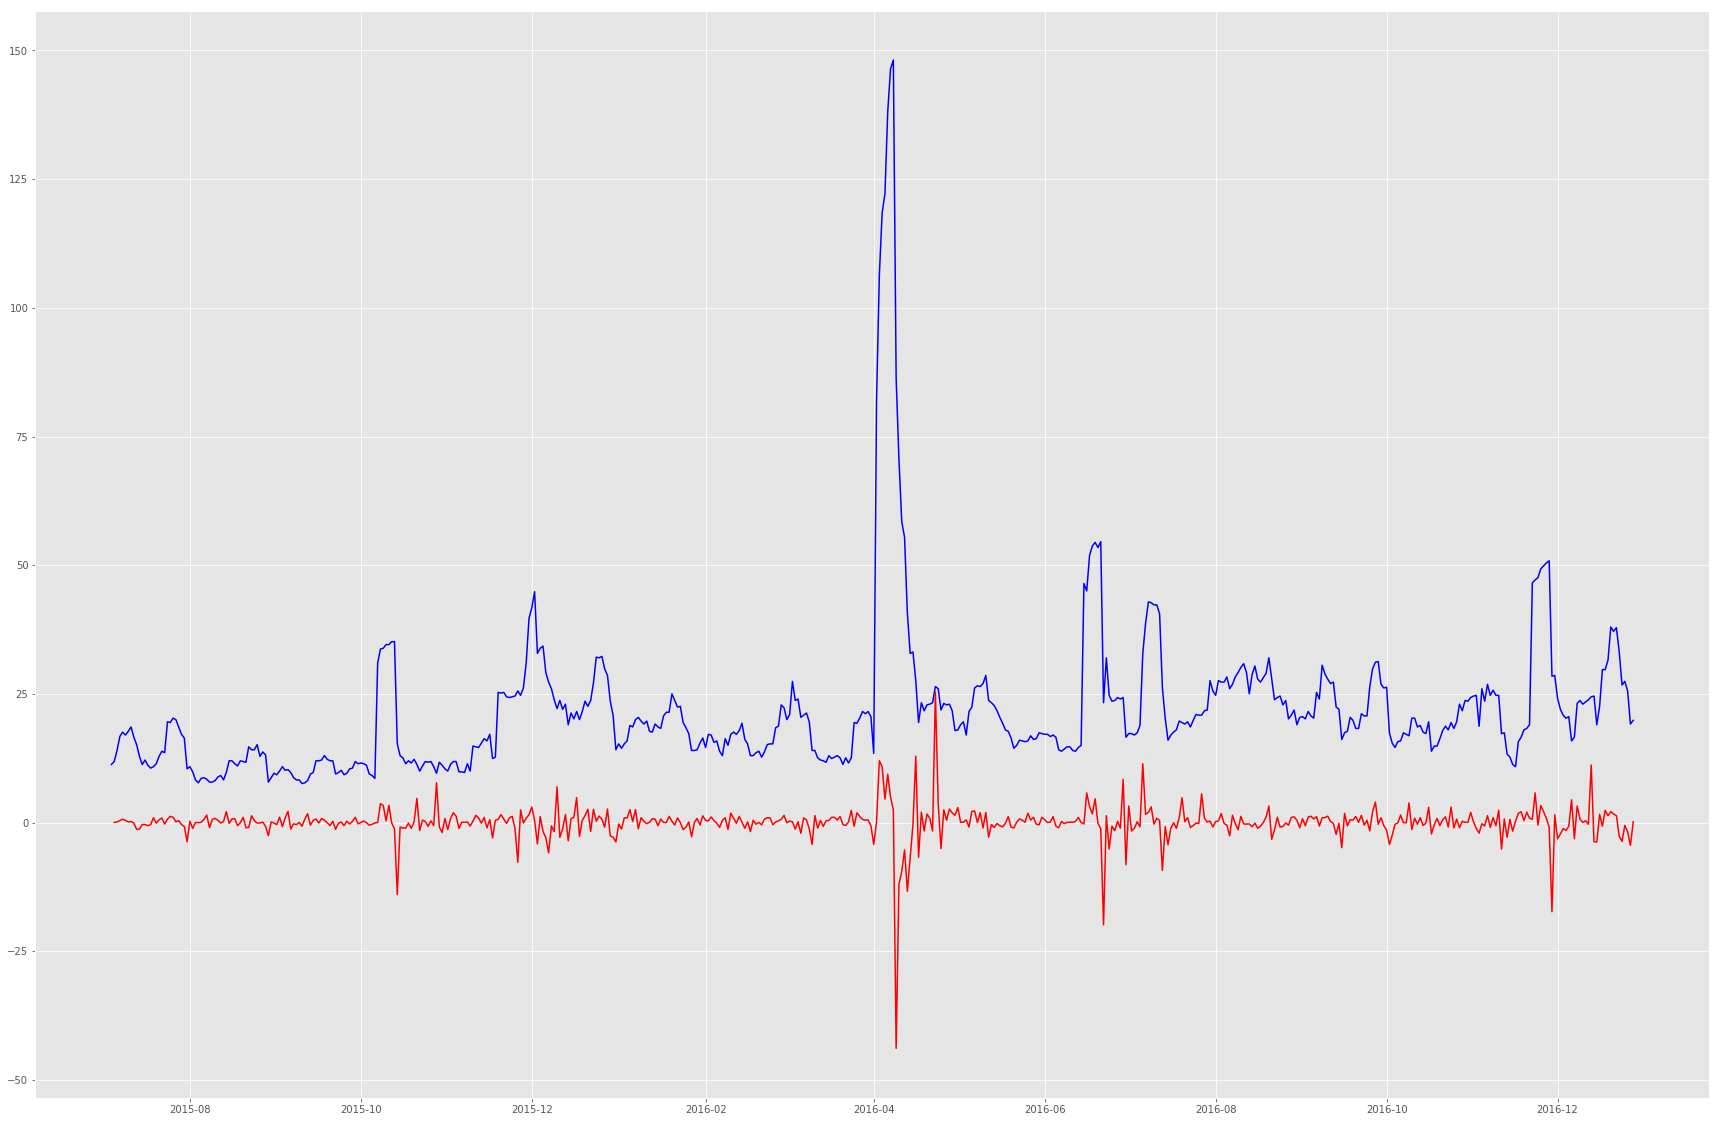

In [97]:
from statsmodels.tsa.arima_model import ARIMA

mode_t = ARIMA(trend_1, order=(20, 1, 0))  
results_AR_t = mode_t.fit(disp=-1)  
plt.plot(trend_1, color = 'blue')
plt.plot(results_AR_t.fittedvalues, color='red')
plt.show()

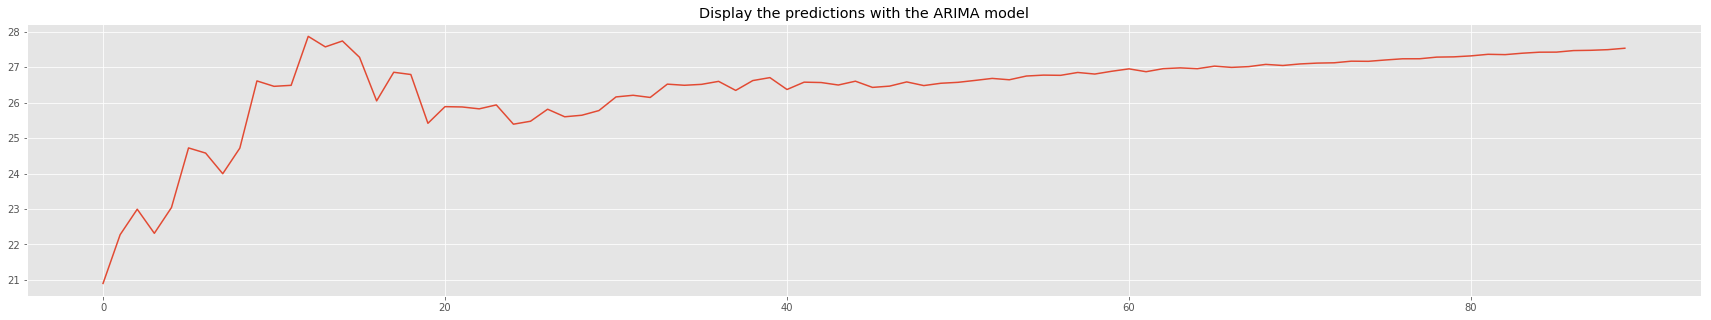

array([ 20.90100808,  22.27615682,  22.99437171,  22.31498492,
        23.04022511,  24.72308652,  24.57763819,  23.99601109,
        24.71816849,  26.61304027,  26.46052207,  26.48884549,
        27.87007621,  27.57334993,  27.73915798,  27.27952072,
        26.0505355 ,  26.85718599,  26.79413878,  25.41786223,
        25.88732705,  25.87866658,  25.8254547 ,  25.93636233,
        25.39282563,  25.47563619,  25.8149404 ,  25.60189557,
        25.64501078,  25.77676816,  26.16180182,  26.20805536,
        26.1469607 ,  26.52214684,  26.49033329,  26.51621965,
        26.60057373,  26.34560571,  26.62309071,  26.70632219,
        26.37120609,  26.5780051 ,  26.56769771,  26.49757503,
        26.60542946,  26.43048049,  26.46634849,  26.58508335,
        26.48173984,  26.54726861,  26.57333622,  26.62730541,
        26.68397915,  26.6455069 ,  26.75108284,  26.77692677,
        26.77076805,  26.85134905,  26.80691969,  26.88617796,
        26.95327703,  26.87288678,  26.95862942,  26.98

In [116]:
forecast = results_AR_t.forecast(steps = 90)[0]
plt.figure(figsize=(30, 5))
plt.plot(pd.DataFrame(forecast))
plt.title('Display the predictions with the ARIMA model')
plt.show()

In [100]:
last_date = train_flattened['date'].max()
last_date

Timestamp('2016-12-31 00:00:00')

In [101]:
df_prediction_arima = df_date_index.copy()



list_date = []
for i in range(91):
    if i >0:
        list_date.append(last_date  + pd.to_timedelta(i, unit='D'))

predictions_arima = pd.DataFrame(list_date,columns = ['Date'])
predictions_arima['Visits'] = 0
predictions_arima.set_index('Date',inplace=True)
predictions_arima['Visits'] = forecast

df_prediction_arima = df_prediction_arima.append(predictions_arima)
df_prediction_arima.reset_index(drop=False,inplace=True)

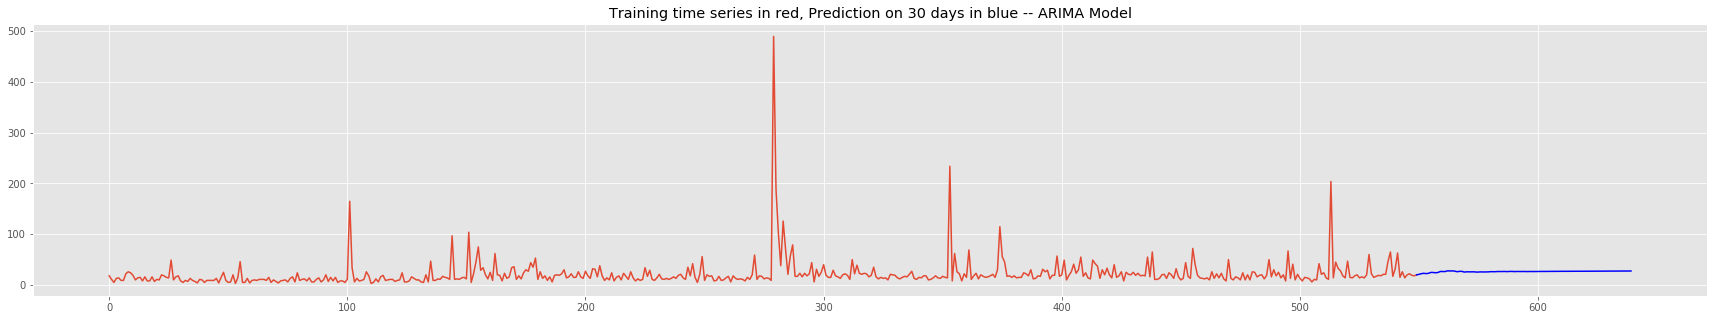

In [103]:
df_arima = df_prediction_arima[['Visits','index']]
train_df = df_arima[df_arima['index'] <= last_date]
df_pred = df_arima[df_prediction_arima['index'] >= last_date]
plt.style.use('ggplot')
plt.figure(figsize=(30, 5))
plt.plot(train_df.index,train_df.Visits)
plt.plot(df_pred.index,df_pred.Visits,color='b')
plt.title('Training time series in red, Prediction on 30 days in blue -- ARIMA Model')
plt.show()

In [163]:
trend_1 = trend.dropna(0)
trend_1.head()

mode_t = ARIMA(trend_1, order=(20, 1, 0))  
results_AR_t = mode_t.fit(disp=-1)  

forecast_t = results_AR_t.forecast(steps = 90)[0]
forecast_t = forecast_t.flatten()

array([ 20.90100808,  22.27615682,  22.99437171,  22.31498492,
        23.04022511,  24.72308652,  24.57763819,  23.99601109,
        24.71816849,  26.61304027,  26.46052207,  26.48884549,
        27.87007621,  27.57334993,  27.73915798,  27.27952072,
        26.0505355 ,  26.85718599,  26.79413878,  25.41786223,
        25.88732705,  25.87866658,  25.8254547 ,  25.93636233,
        25.39282563,  25.47563619,  25.8149404 ,  25.60189557,
        25.64501078,  25.77676816,  26.16180182,  26.20805536,
        26.1469607 ,  26.52214684,  26.49033329,  26.51621965,
        26.60057373,  26.34560571,  26.62309071,  26.70632219,
        26.37120609,  26.5780051 ,  26.56769771,  26.49757503,
        26.60542946,  26.43048049,  26.46634849,  26.58508335,
        26.48173984,  26.54726861,  26.57333622,  26.62730541,
        26.68397915,  26.6455069 ,  26.75108284,  26.77692677,
        26.77076805,  26.85134905,  26.80691969,  26.88617796,
        26.95327703,  26.87288678,  26.95862942,  26.98

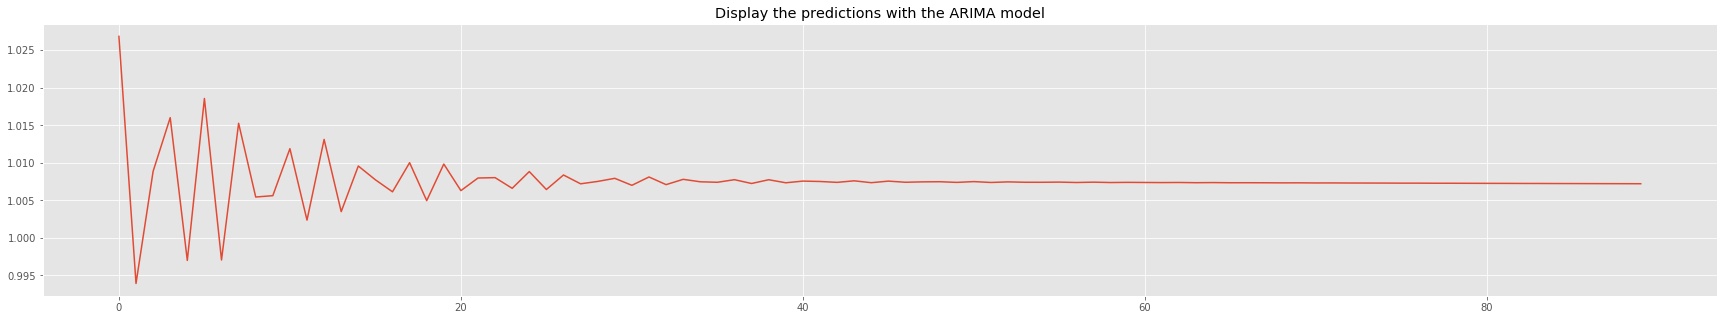

In [130]:
# seasonal_1 = seasonal.dropna(0)

# mode_s = ARIMA(seasonal_1, order=(5, 1, 0))  
# results_AR_s = mode_s.fit(disp=-1)  

# forecast_s = results_AR_s.forecast(steps = 90)[0]
# forecast_s
# plt.figure(figsize=(30, 5))
# plt.plot(pd.DataFrame(forecast_s))
# plt.title('Display the predictions with the ARIMA model')
# plt.show()

In [166]:
forecast_s = np.array(seasonal.iloc[4:94])
#frecast_s.reshape((1,90))
forecast_s = forecast_s.flatten()
forecast_s

array([ 1.13264518,  0.8728885 ,  0.99851281,  0.99901257,  0.97735227,
        1.03243837,  0.9871503 ,  1.13264518,  0.8728885 ,  0.99851281,
        0.99901257,  0.97735227,  1.03243837,  0.9871503 ,  1.13264518,
        0.8728885 ,  0.99851281,  0.99901257,  0.97735227,  1.03243837,
        0.9871503 ,  1.13264518,  0.8728885 ,  0.99851281,  0.99901257,
        0.97735227,  1.03243837,  0.9871503 ,  1.13264518,  0.8728885 ,
        0.99851281,  0.99901257,  0.97735227,  1.03243837,  0.9871503 ,
        1.13264518,  0.8728885 ,  0.99851281,  0.99901257,  0.97735227,
        1.03243837,  0.9871503 ,  1.13264518,  0.8728885 ,  0.99851281,
        0.99901257,  0.97735227,  1.03243837,  0.9871503 ,  1.13264518,
        0.8728885 ,  0.99851281,  0.99901257,  0.97735227,  1.03243837,
        0.9871503 ,  1.13264518,  0.8728885 ,  0.99851281,  0.99901257,
        0.97735227,  1.03243837,  0.9871503 ,  1.13264518,  0.8728885 ,
        0.99851281,  0.99901257,  0.97735227,  1.03243837,  0.98

In [167]:
residual_1 = residual.dropna(0)
residual_1.head()

mode_r = ARIMA(residual_1, order=(11, 1, 0))  
results_AR_r = mode_r.fit(disp=-1)  

forecast_r = results_AR_r.forecast(steps = 90)[0]
forecast_r = forecast_r.flatten()
forecast_r

In [168]:
forecast = np.add(forecast_t , forecast_s , forecast_r)
forecast

array([ 22.03365326,  23.14904533,  23.99288452,  23.31399749,
        24.01757738,  25.7555249 ,  25.56478849,  25.12865627,
        25.591057  ,  27.61155308,  27.45953464,  27.46619775,
        28.90251459,  28.56050023,  28.87180316,  28.15240923,
        27.04904831,  27.85619856,  27.77149104,  26.45030061,
        26.87447735,  27.01131176,  26.69834321,  26.93487514,
        26.39183821,  26.45298845,  26.84737877,  26.58904587,
        26.77765596,  26.64965666,  27.16031463,  27.20706793,
        27.12431297,  27.55458521,  27.47748359,  27.64886483,
        27.47346223,  27.34411852,  27.62210328,  27.68367446,
        27.40364446,  27.56515539,  27.70034289,  27.37046354,
        27.60394227,  27.42949306,  27.44370076,  27.61752173,
        27.46889014,  27.67991378,  27.44622472,  27.62581822,
        27.68299172,  27.62285916,  27.78352121,  27.76407707,
        27.90341322,  27.72423756,  27.8054325 ,  27.88519053,
        27.9306293 ,  27.90532516,  27.94577972,  28.11

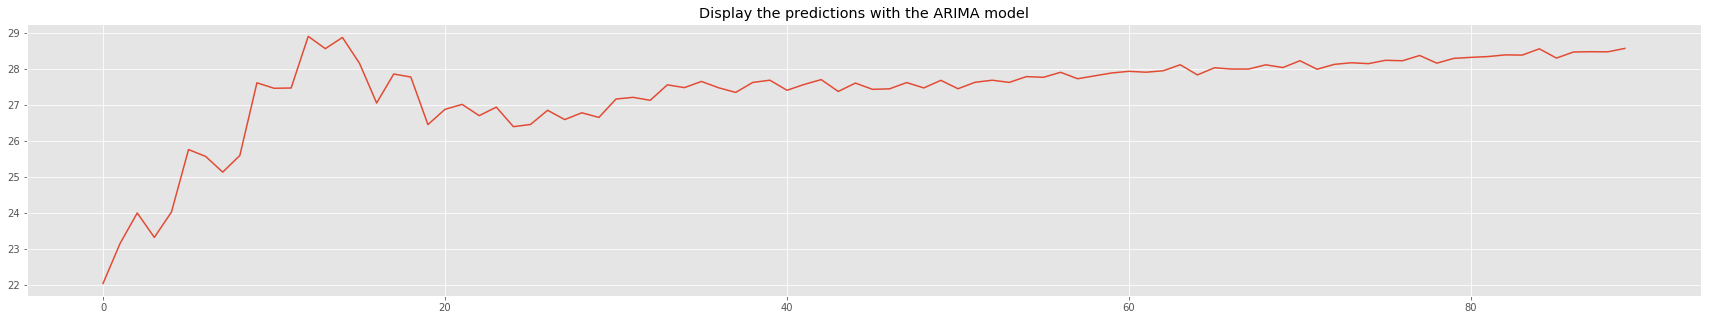

In [169]:
plt.figure(figsize=(30, 5))
plt.plot(pd.DataFrame(forecast))
plt.title('Display the predictions with the ARIMA model')
plt.show()

In [172]:
last_date = train_flattened['date'].max()
last_date
df_prediction_arima = df_date_index.copy()



list_date = []
for i in range(91):
    if i >0:
        list_date.append(last_date  + pd.to_timedelta(i, unit='D'))

predictions_arima = pd.DataFrame(list_date,columns = ['Date'])
predictions_arima['Visits'] = 0
predictions_arima.set_index('Date',inplace=True)
predictions_arima['Visits'] = forecast

df_prediction_arima = df_prediction_arima.append(predictions_arima)
df_prediction_arima.reset_index(drop=False,inplace=True)

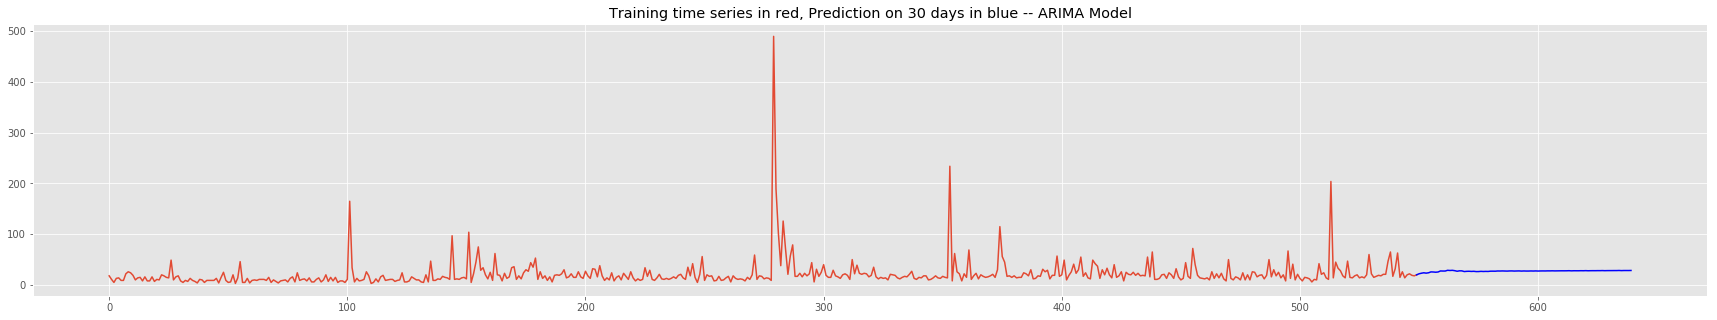

In [173]:
df_arima = df_prediction_arima[['Visits','index']]
train_df = df_arima[df_arima['index'] <= last_date]
df_pred = df_arima[df_prediction_arima['index'] >= last_date]
plt.style.use('ggplot')
plt.figure(figsize=(30, 5))
plt.plot(train_df.index,train_df.Visits)
plt.plot(df_pred.index,df_pred.Visits,color='b')
plt.title('Training time series in red, Prediction on 30 days in blue -- ARIMA Model')
plt.show()